# Census Income Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics, preprocessing
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.feature_selection import RFECV
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.linear_model import LogisticRegression, LassoLarsIC
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
#from sklearn.tree import DecisionTreeRegressor

In [2]:
df= pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
num_attributes = df.select_dtypes(include=['int'])
print(num_attributes.columns)

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


In [8]:
print(df['Workclass'].unique())
print('***************************************************')
print(df['Education'].unique())
print('***************************************************')
print(df['Education_num'].unique())
print('***************************************************')
print(df['Marital_status'].unique())
print('***************************************************')
print(df['Occupation'].unique())
print('***************************************************')
print(df['Relationship'].unique())
print('***************************************************')
print(df['Race'].unique())
print('***************************************************')
print(df['Sex'].unique())
print('***************************************************')
print(df['Capital_gain'].unique())
print('***************************************************')
print(df['Capital_loss'].unique())
print('***************************************************')
print(df['Hours_per_week'].unique())
print('***************************************************')
print(df['Native_country'].unique())
print('***************************************************')
print(df['Income'].unique())
print('***************************************************')
print(df['Fnlwgt'].unique())
print('***************************************************')

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
***************************************************
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
***************************************************
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
***************************************************
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
***************************************************
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
***********************************************

In [9]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [10]:
df['Occupation'] = df['Occupation'].replace(" ?"," Prof-specialty")

In [11]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [13]:
df['Workclass'] = df['Workclass'].replace(" ?"," Private")


In [14]:
df['Native_country'] = df['Native_country'].replace(" ?"," United-States")

<AxesSubplot:xlabel='Fnlwgt', ylabel='count'>

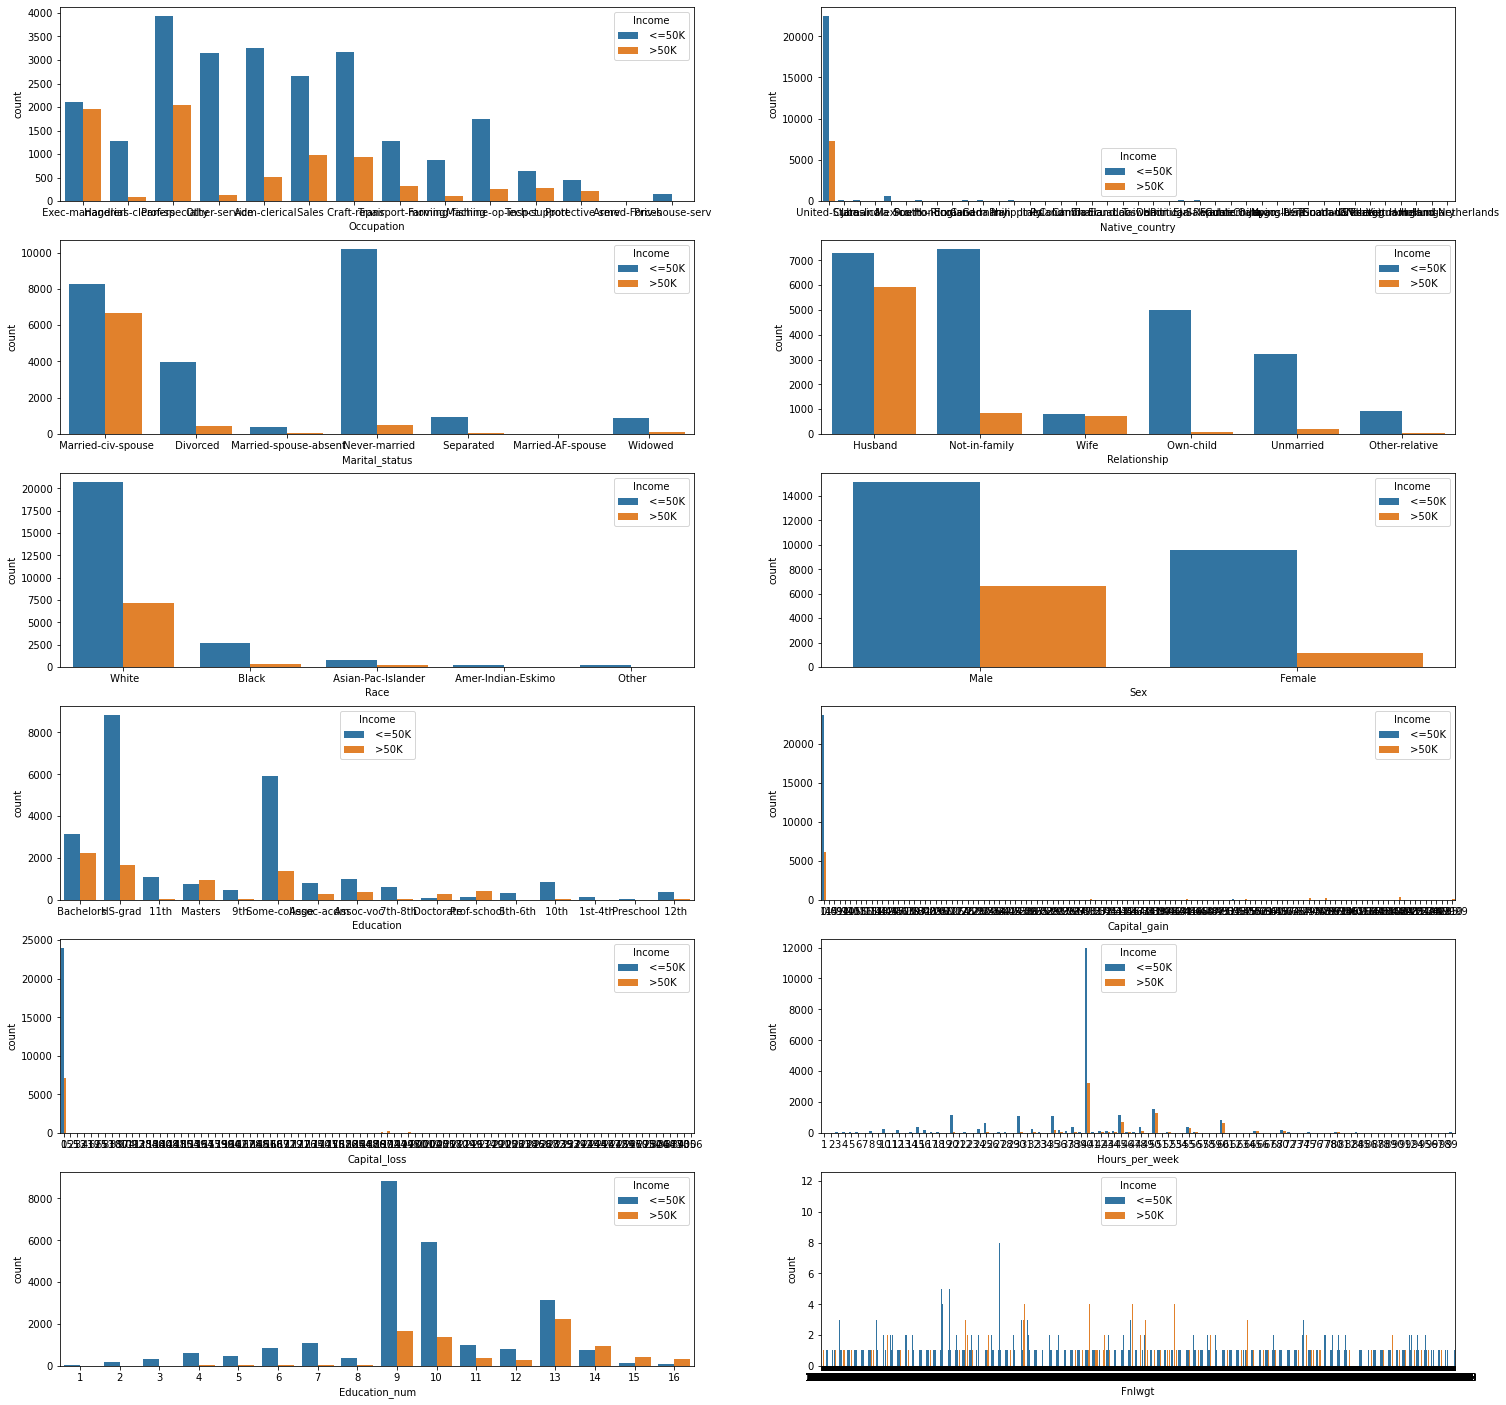

In [15]:
fig, axarr = plt.subplots(6,2, figsize=(25, 25))
sns.countplot(x='Occupation', hue='Income',data=df,ax=axarr[0][0])
sns.countplot(x='Native_country',hue='Income',data = df,ax=axarr[0][1])
sns.countplot(x='Marital_status', hue='Income', data=df,ax=axarr[1][0])
sns.countplot(x="Relationship", hue="Income", data=df,ax=axarr[1][1])
sns.countplot(x="Race", hue="Income", data=df,ax=axarr[2][0])
sns.countplot(x="Sex", hue="Income", data=df,ax=axarr[2][1])
sns.countplot(x="Education", hue="Income", data=df,ax=axarr[3][0])
sns.countplot(x="Capital_gain", hue="Income", data=df,ax=axarr[3][1])
sns.countplot(x="Capital_loss", hue="Income", data=df,ax=axarr[4][0])
sns.countplot(x="Hours_per_week", hue="Income", data=df,ax=axarr[4][1])
sns.countplot(x="Education_num", hue="Income", data=df,ax=axarr[5][0])
sns.countplot(x="Fnlwgt", hue="Income", data=df,ax=axarr[5][1])

# Data Analysis and Data Visualization

In [16]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

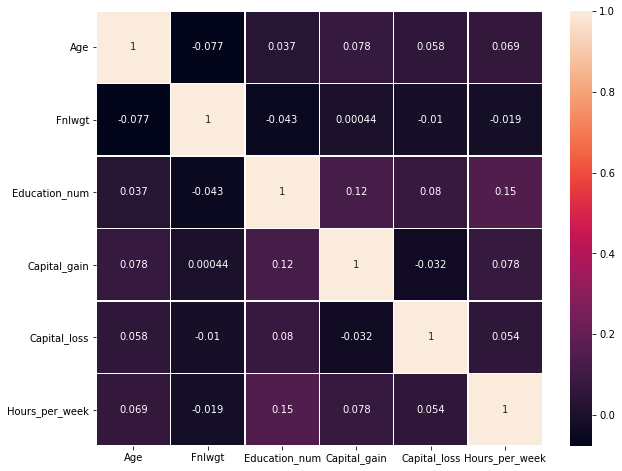

In [17]:
#Correlation coefficients are used in statistics to measure how strong a relationship is between two variables

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidth=0.5)

In [18]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
df_counts = df['Education'].value_counts()
df_counts[:20]

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

# Distribution of Population across various education levels

<AxesSubplot:title={'center':'Distribution of Education'}>

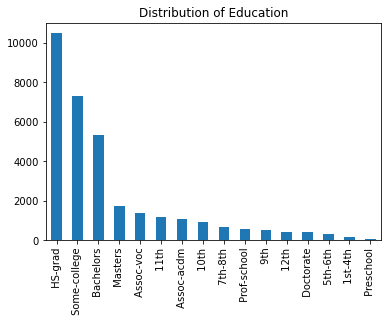

In [20]:
df['Education'].value_counts().plot.bar(title="Distribution of Education")

# Frequency distribution based on marital status

In [21]:
df_counts = df['Marital_status'].value_counts()
df_counts[:20]

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:title={'center':'Distribution of Marital Status'}>

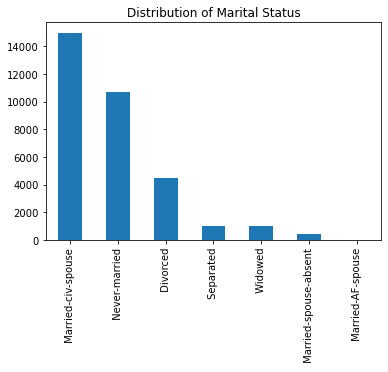

In [22]:
df['Marital_status'].value_counts().plot.bar(title="Distribution of Marital Status")

# Barplot displaying count of population across race

<AxesSubplot:title={'center':'Distribution of Race'}>

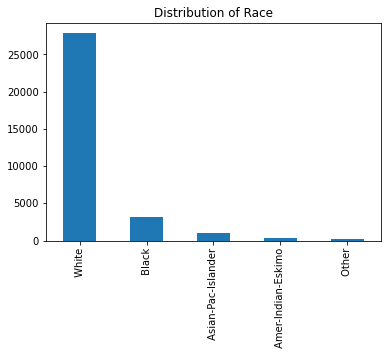

In [23]:
df['Race'].value_counts().plot.bar(title="Distribution of Race")

# Frequency distribution of gender

<AxesSubplot:title={'center':'Distribution of Gender'}>

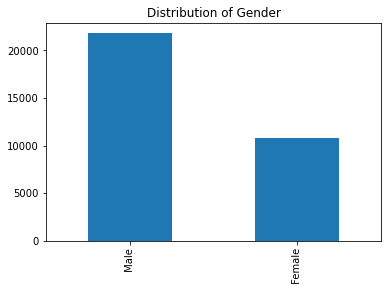

In [24]:
df['Sex'].value_counts().plot.bar(title="Distribution of Gender")

# Frequency distribution of Income

<AxesSubplot:title={'center':'Distribution of Income'}>

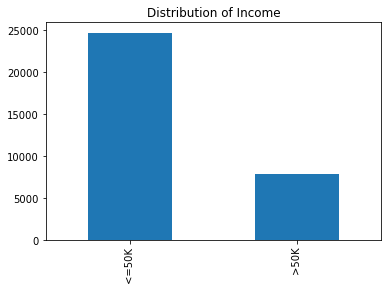

In [25]:
df['Income'].value_counts().plot.bar(title="Distribution of Income")

# Frequency distribution of age

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

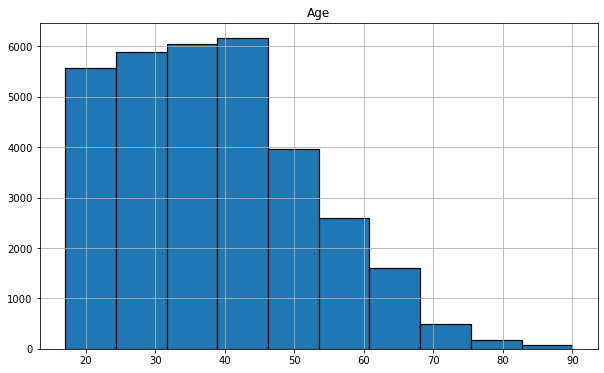

In [26]:
df.hist(column = 'Age' ,edgecolor='black', linewidth=1.2, figsize = (10,6))

# Box plot showing distribution of age

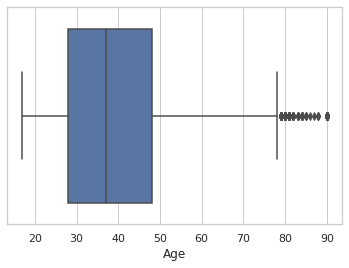

In [27]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Age"])

/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

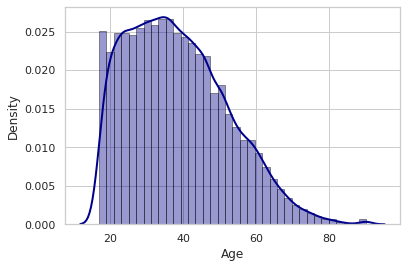

In [28]:
sns.distplot(df['Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# Strip plot showing density of income across different age groups based on gender

Text(0.5, 1.0, 'Income controlled by Age and Gender')

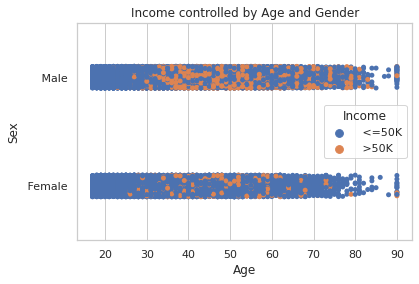

In [29]:
ax = sns.stripplot(x='Age', y='Sex', data=df,hue='Income')
ax.set_title('Income controlled by Age and Gender')

# Gender distribution based on education levels

<AxesSubplot:xlabel='Education'>

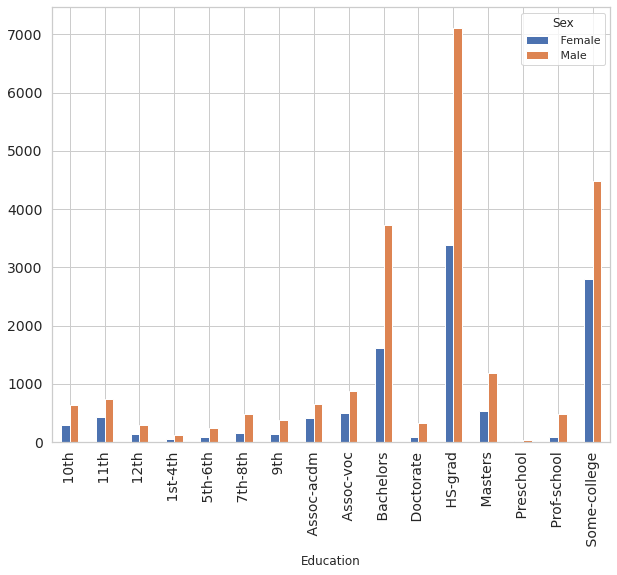

In [30]:
df.groupby(["Education","Sex"]).size().unstack("Sex").plot(kind="bar",fontsize=14,figsize=(10, 8))

# Income distribution across gender

<AxesSubplot:xlabel='Sex'>

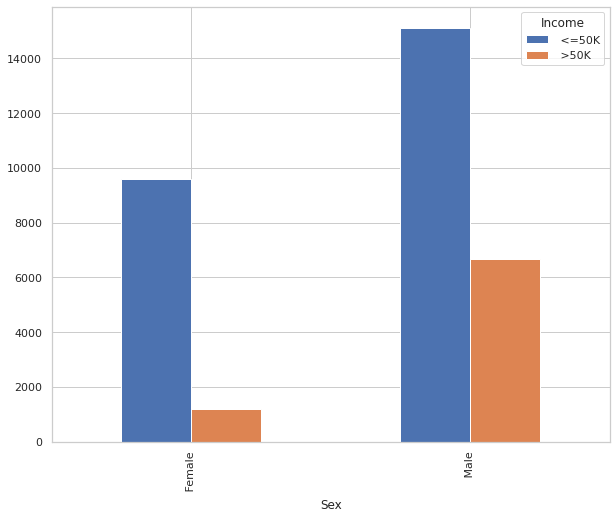

In [31]:
df.groupby(['Income','Sex']).size().unstack('Income').plot(kind="bar",figsize=(10, 8))

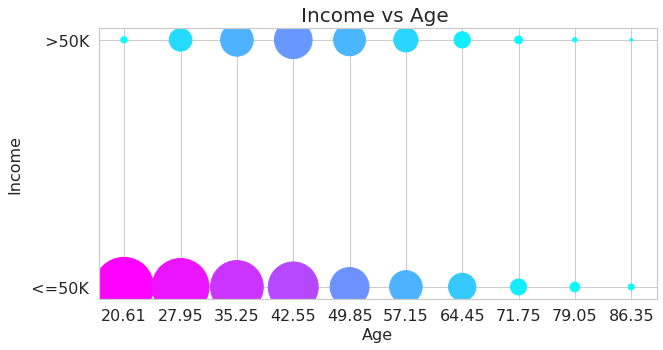

In [32]:
from bubble_plot.bubble_plot import bubble_plot
bubble_plot(df,'Age','Income', normalization_by_all=True)

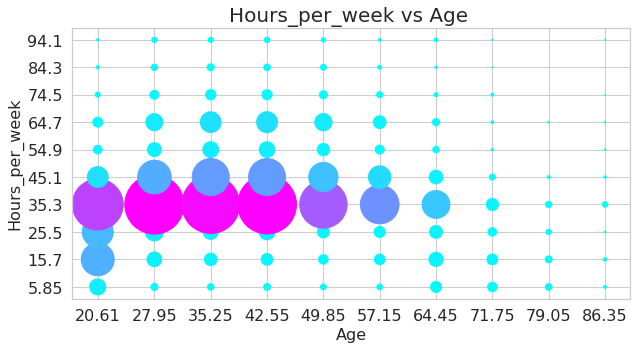

In [33]:


bubble_plot(df,'Age','Hours_per_week', normalization_by_all=True)

# Data preprocessing

In [34]:
labelencoder = preprocessing.LabelEncoder()
df['Workclass'] = labelencoder.fit_transform(df.Workclass)
df['Marital_status'] = labelencoder.fit_transform(df.Marital_status)
df['Occupation'] = labelencoder.fit_transform(df.Occupation)
df['Relationship'] = labelencoder.fit_transform(df.Relationship)
df['Race'] = labelencoder.fit_transform(df.Race)
df['Sex'] = labelencoder.fit_transform(df.Sex)
df['Native_country'] = labelencoder.fit_transform(df.Native_country)
df['Income'] = labelencoder.fit_transform(df.Income)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,11th,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,Masters,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,HS-grad,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,HS-grad,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,HS-grad,9,4,0,3,4,1,0,0,20,38,0


# Corelation between Fnlwgt and Income

In [35]:
column_1 = df['Fnlwgt']
column_2 = df['Income']
correlation = column_1.corr(column_2)
print(correlation)

-0.009481165679736102


# Dropping unwanted columns

In [36]:
data = df.drop(['Fnlwgt','Education'],axis=1)

In [39]:
x_train = data.drop(['Income'],axis=1)
y_train = data['Income']

In [40]:
scaler = preprocessing.StandardScaler().fit(data)
scaler.transform(data)

array([[ 0.83709708,  1.72133587,  1.13477863, ..., -2.22212013,
         0.26137428, -0.5632099 ],
       [-0.04264043, -0.08522344, -0.42002663, ..., -0.03542999,
         0.26137428, -0.5632099 ],
       [ 1.05703146, -0.08522344, -1.19742926, ..., -0.03542999,
         0.26137428, -0.5632099 ],
       ...,
       [ 1.42358875, -0.08522344, -0.42002663, ..., -0.03542999,
         0.26137428, -0.5632099 ],
       [-1.21562378, -0.08522344, -0.42002663, ..., -1.65520046,
         0.26137428, -0.5632099 ],
       [ 0.98372   ,  0.81805622, -0.42002663, ..., -0.03542999,
         0.26137428,  1.77553698]])

In [41]:
x_train = preprocessing.scale(x_train)

# Bagging classifier

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
#from numpy import mean
#from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [44]:
model = BaggingClassifier(n_estimators=50)
model.fit(x_train,y_train)

BaggingClassifier(n_estimators=50)

In [45]:
y_pred = model.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Data:",acc_score)

Accuracy of Data: 0.975061425061425


# Logistic Regression Implementation

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

# Prediction of train data

In [48]:
y_pred = logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Data:",acc_score)

Accuracy of Data: 0.8248157248157248


# Random forest

In [49]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=50,max_depth=10)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [50]:
pred_train = random_forest.predict(x_train)
acc_score=metrics.accuracy_score(y_train,pred_train) #gives the accuracy of the model
print("Accuracy of Data:", acc_score)

Accuracy of Data: 0.8690110565110565


# KNN IMPLEMENTATION

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)   
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

# Prediction of train data

In [52]:
y_pred=knn.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Data:", acc_score)

Accuracy of Data: 0.8408783783783784


# Adaboost implementation

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=25, random_state=0, algorithm='SAMME')
clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=25, random_state=0)

In [54]:
clf_pred = clf.predict(x_train)
acc_score = metrics.accuracy_score(y_train,clf_pred)
print("Accuracy of Data:", acc_score)

Accuracy of Data: 0.8446560196560197


# GRADIENT BOOSTING

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gra_model = GradientBoostingClassifier(max_depth=4,n_estimators=100)
gra_model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4)

In [56]:
gra_modl_pred = gra_model.predict(x_train)
acc_score = metrics.accuracy_score(y_train,gra_modl_pred)
print("Accuracy of Data:", acc_score)

Accuracy of Data: 0.8760135135135135


# SVM IMPLEMENTATION

In [57]:
from sklearn import svm
svm_model = svm.SVC(kernel = 'linear').fit(x_train,y_train)

In [58]:
svm_pred_train = svm_model.predict(x_train)
acc_score = metrics.accuracy_score(y_train,svm_pred_train)
print("Accuracy of Data:", acc_score)

Accuracy of Data: 0.8145884520884521


# Deccision tree classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=7)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [60]:
y_pred=dtree.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Data:", acc_score)

Accuracy of Data: 0.8592751842751842
